<a href="https://colab.research.google.com/github/tkrumpol/Pyomo_tutorial/blob/main/Pyomo_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pyomo Tutorial with NetworkX Visualization

This tutorial will focus on the mathematical optimization package [Pyomo](http://www.pyomo.org/about). We will also be covering basics of visualization with [NetworkX](https://networkx.org/) because of the practicality of the example covered in this tutorial. Pyomo is an open source Python based algebraic modeling language (AML). Pyomo allows the user to easily write out model formulations with the readibility of Python and flexibility of using optimized, compiled solvers written in lower level languages. For those unfamiliar with mathematical programming (MP), this is an area that deals with every problem related to mathematical optimization. Problems in areas ranging from operations research to molecular modeling and systems biology can be formulated as mathematical optimization problems. As such, it is paramount to make preliminary modeling tools available to more than just experts and instead use intiutive software to aid in any decision making processes. Here, any problem can usually be partitioned into a few key components:
* **Parameters**: These are the known model quantities that are given as input to the problem. This is the data that is available (or features matrix to relate back to class). 
* **Variables**: These are the unknown model quantities that the model is trying to solve for. The *optimal* values of these variables are the solution of the overall optimization problem. An example could be the shortest path from one location to another. 
* **Constraints**: These are the inequalities or equations that represent rules that the problem needs to abide by. Something like, the temperature of the reactor must be under 200 degrees. Or, if one person is assigned a task at time t, they may not perform another task at this same time. 
* **Objective Function**: This function is the overall goal of the problem. Typically this is related to minimizing error, time, or loss. Or equivalent ideas such as maximizing profit. 
    

## Tutorial Content

In this tutorial we will outline how to do basic modeling and visualization with Pyomo and NetworkX. 

We will cover the following topics in this tutorial:
- [Installing the libraries](#Installing-the-libraries)
- [A Simple Example](#A-Simple-Example)
- [A Practical Example](#A-Practical-Example)
   - [Problem Statement](#The-Problem)
   - [The Model](#The-Model)
   - [Visualizing the Solution](#Visualizing-the-optimal-set-of-routes)
- [Summary and References](#Summary-and-References)

## Installing the libraries

Before starting, you will need to install pyomo and its dependencies. This can either be done with pip: 

    $ pip install pyomo

Additionally you will need to install some open sourse solvers which will be sufficient for many problems. The solver GLPK is good for mixed-integer linear programs (MILP) and IPOPT for nonlinear programs (NLP). 

    conda install -c conda-forge glpk
    conda install -c conda-forge ipopt
      

For the purposes of this tutorial, we will exclusively use the glpk solver. If you are curious about why we have different solvers for different problem formulations, please see some of the resources at the bottom.  

In [ ]:
pip install pyomo

Note: you may need to restart the kernel to use updated packages.


Installation can be lengthy so please allow it some time to install when running the command in the cell below.

In [ ]:
!apt-get install -y -qq glpk-utils

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::pango==1.42.4=h049681c_0
  - defaults/linux-64::_anaconda_depends==2019.03=py37_0
  - defaults/linux-64::anaconda==custom=py37_1
done

## Package Plan ##

  environment location: /home/tommy/anaconda3

  added / updated specs:
    - glpk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |    h18b612c_1001         1.5 MB  conda-forge
    conda-4.10.0               |   py37h89c1867_1         3.1 MB  conda-forge
    fontconfig-2.13.1          |    he4413a7_1000         327 KB  conda-forge
    harfbuzz-2.4.0             |       hca77d97_0         791 KB
    libuuid-2.32.1             |    h14c3975_1000          26 KB  conda-forge
    pango-1.42.4               |       ha030887_1         517 KB

Now that we have Pyomo and a solver installed, we can import the necessary packages.  

In [ ]:
from pyomo.environ import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

### A Simple Example

Let us first start by examining a simple model:
\begin{align}
    \min_{x_1, x_2} && -2x_1 &- 3x_2 \\
    \text{s.t.} && x_1 + x_2  &\leq 4 \\
    && x_1 + 2x_2 &\leq 6 \\
    && x_1, x_2 &\geq 0
\end{align}

 Here we have two continuous variables: $x_1, x_2$, two linear inequalities which lay out a relation that the solution of these variables must maintain, and an objective function. Ultimately, our goal is to find the smallest value of the objective function that still satisfies the two stated inequalities and bounds.  

For a simple two dimenstional problem such as this, we can plot the contours of the objective function, feasible region, and constrains to likely figure out by inspection what the optimal solution should be. Since the focus of this tutorial is using Pyomo, we will skip the next few lines of code and focus on the plot of the simple example:

In [ ]:
def obj(x1, x2):
    return -2*x1 - 3*x2

def con1(x2):
    return 4 - x2

def con2(x2):
    return 6 - 2*x2

In [ ]:
x1_vals = np.linspace(-5, 10, 1000)
x2_vals = np.linspace(-5, 10, 1000)

In [ ]:
con1_vals = np.array([con1(i) for i in x2_vals])
con2_vals = np.array([con2(i) for i in x2_vals])

In [ ]:
bound_x1 = np.ones(len(x2_vals)) * 0
bound_x2 = np.ones(len(x1_vals)) * 0

In [ ]:
X1, X2 = np.meshgrid(x1_vals, x2_vals)
obj_val = obj(X1, X2)
levels = (-14, -10, -5, 0)

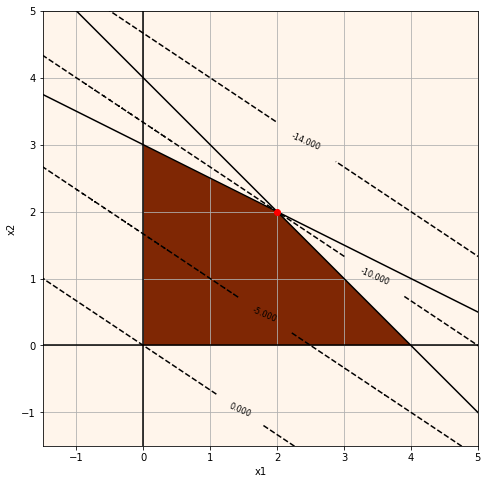

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow( ((X1>=0) & (X2>=0) & (X1+2*X2<=6) & (X1+X2<=4)).astype(int) , 
                extent=(X1.min(),X1.max(),X2.min(),X2.max()),origin="lower", cmap="Oranges")
ax = plt.gca()
CS = ax.contour(X1, X2, obj_val, levels=levels, colors='k', linestyles={"dashed"})
ax.clabel(CS, inline=1, fontsize=8)
plt.xlim([-1.5,5.0])
plt.ylim([-1.5,5.0])
plt.plot(con1_vals, x2_vals, 'k', label = "constraint 1")
plt.plot(con2_vals, x2_vals, 'k', label = "constraint 2")
plt.plot(bound_x1, x2_vals, 'k', label = "bound x1")
plt.plot(x1_vals, bound_x2, 'k', label = "bound x2")
plt.plot(2,2,'ro') 
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()

The dark red area on the plot above represents the feasible region for this problem.
The solid black lines are the constraints.
The dashed lines are the values of the objective function.

As we can see, the optimal solution should lie at the intersection of ($x_1,x_2$) = (2,2) with an objective function value equal to -10.0

To verify and solve this model using Pyomo, we can build the model with the following steps:

we start by creating an instance of a concrete model and adding our variables and constraints to it:

In [ ]:
m = ConcreteModel()

Then we define our variables $x_1, x_2$ and the domain of values they can take. Here we are constrained to positive values, so we will use the domain NonNegativeReals. The *Var* declares *x* as a variable in Pyomo, and the list 1,2 are the indicies that *x* will take:

In [ ]:
m.x = Var([1,2], domain=NonNegativeReals)

Next we can write out our constraints. Similar to calling variables in Pyomo, the Constraint class will take the expression (*expr*) entered as the inequality that must be satisified with the model:

In [ ]:
m.con1 = Constraint(expr = m.x[1] + m.x[2] <= 4)
m.con2 = Constraint(expr = m.x[1] + 2*m.x[2] <= 6.0)

and lastly our objective function declared with Objective, an expression similar to the Constraint expression we are interested in, and either *minimize* or *maximize* as an arguement indication of whether we want to find the minimum or maximum value that satisfies the rest of the model:

In [ ]:
m.obj = Objective(expr = -2*m.x[1] - 3*m.x[2], sense=minimize) 

In order to solve this problem, we need to specify the solver. Since both the objective function and constraints are linear, we can use the open source MILP solver we previously installed:

In [ ]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(m).write()

Now we can check a few things about our solution to make sure they line up with the preliminary plotting we had done above, such as verifying the constraints, final values of the variables, and final objective function value:

In [ ]:
print("Constraint 1 is active at the optimal solution:",m.con1.active)
print("Constraint 2 is active at the optimal solution:",m.con2.active)
print("The optimal value of (x1,x2):({})".format([value(i) for i in m.x.values()]))
print("The optimal value of the objective function is:",  value(m.obj))

Constraint 1 is active at the optimal solution: True
Constraint 2 is active at the optimal solution: True
The optimal value of (x1,x2):([2.0, 2.0])
The optimal value of the objective function is: -10.0


## A Practical Example

Now that we have an idea for how formulating a simple model looks like with an objective functions and some constraints, let's look at a more practical example using Pyomo and NetworkX.

### The Problem

A common problem related to network design is related to detemine the best route for moving product from where it is produced to where it will eventually by purchased by the consumer.
We will outline an example network design model. Here we have nodes which are partitioned into three sets: supply, transshipment, and demand.
* Supply Nodes: Each able to produce at certain quantity of product
* Transshippment Nodes: Intermediate nodes that have no supply or demand
* Demand Nodes: Nodes that must receive the required amount of product

We will also outline a few additional constraints:
* No link connection (edge) may carry more than a certain amount. This can be thought of as an upper bound on the total amount a truck could carry in for example.
* Amounts can only move in-between or forward from supply to transshippment to demand nodes. That is, supply nodes may send material between one another, but once the material has been shipped forward to a transshippment or demand node, it may not travel or be sent back.

### The Model
#### Given
* *N* = set of all nodes = $N_S + N_T + N_D$ (supply, transshippment, demand nodes)
* *A* = set of edges from node *i* to node *j* that may have flow
* *$S_i$* = Supply capacity of each supply node *i* in $N_S$
* *$D_i$* = Demand of each demand node *i* in $N_D$
* *$c_{ij}$* = Cost of using the edge between node *i* to node *j* to ship material. For simplicity this cost will encapulate the entire cost (shipping, handeling, etc.)
* *$u_{ij}$* = Maximum amount of shipping material using the edge between node *i* to node *j*. For simplicity this capacity will be the same for all edges  

#### Determine
* *$x_{ij}$* = The amount to be shipped from node *i* to node *j*

#### Mathematical Model
The objective function is to minimize the total cost.
The assiciated constraints can be thought of as mass balances around the different sets of nodes. 
* The first constraint enforces that the amount coming into or out of the supply nodes must be less than the total amount of supply that it can produce. 
* The second constraint ensures that any amount going into the transhippment nodes is exactly equal to the amount going out. These nodes cannot store any product. 
* The third constraint satisfies the demand for each demand node. 
* The last constraint is an upper bound on the capacity of a link
\begin{align}
    \min_{x_{ij}} && &\sum_{i,j \in A} c_{ij}x_{ij} \\
    \text{s.t.} && 0 &\leq \sum_{j \in V} x_{ij} - \sum_{j \in V} x_{ji}  \leq S_i  & \forall i \in V_S \\
    && &\sum_{j \in V} x_{ij} - \sum_{j \in V} x_{ji}  = 0  & \forall i \in V_T \\
    && &\sum_{j \in V} x_{ji} - \sum_{j \in V} x_{ij}  \leq D_i  & \forall i \in V_D \\
    && &0 \leq x_{ij}\leq u_{ij}
\end{align}

#### Input Data for the model
* $N_S$ = {1,2,3} supply nodes
* $N_T$ = {4,5} transshippment nodes
* $N_D$ = {6,7} demand nodes
* $u_{ij}$ = 200
* $S$ = {1: 200, 2: 300, 3: 100}
* $D$ = {6: 400, 7: 180}

We start by creating lists for all of the necessary nodes

In [ ]:
nodes = list(range(1,8))
supply_nodes = list(range(1,4))
transshippment_nodes = list(range(4,6))
demand_nodes = list(range(6,8))

Then we create dictionaries for the supply and demand nodes where the values in the dictionary are the maximum total amount the node can produce or the amount demanded.  We also include the maximum capacity link. As an example, node 1 can at most produce 200 units of product and node 7 must receive 180 units to satisfy the demand.

In [ ]:
supply = {1: 200.0,
          2: 300.0,
          3: 100.0}
demand = {6: 400.0,
          7: 180.0}
max_capacity = 200.0

Next we have our supplied cost table. This would typically come from some database, where the cost from shipping from node *i* to node *j* in some unit value is each row, column entry. Any paths that are not allowed are highlighted in black. They are marked by "flag" values of -1 for simplicity. The paths that are not allowed are any backtracking and any flow from a node back to itself (as stated in the problem statement).  

In [ ]:
cost_table = np.array([[-1.0, 5.0, 3.0, 5.0, 5.0, 20.0, 20.0],
                       [9.0, -1.0, 9.0, 1.0, 1.0, 8.0, 15.0],
                       [0.4, 8.0, -1.0, 1.0, 0.5, 10.0, 12.0],
                       [-1.0, -1.0, -1.0, -1.0, 1.2, 2.0, 12.0],
                       [-1.0, -1.0, -1.0, 0.8, -1.0, 2.0, 12.0],
                       [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0],
                       [-1.0, -1.0, -1.0, -1.0, -1.0, 7.0, -1.0]])
df = pd.DataFrame(cost_table, columns = nodes, index=nodes)
# Visualize the entries that are not allowed by highlighting them in black. 
df = df.style.highlight_min(color='black').set_precision(2)
df

,1,2,3,4,5,6,7
1,-1.00,5.00,3.00,5.00,5.00,20.00,20.00
2,9.00,-1.00,9.00,1.00,1.00,8.00,15.00
3,0.40,8.00,-1.00,1.00,0.50,10.00,12.00
4,-1.00,-1.00,-1.00,-1.00,1.20,2.00,12.00
5,-1.00,-1.00,-1.00,0.80,-1.00,2.00,12.00
6,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,1.00
7,-1.00,-1.00,-1.00,-1.00,-1.00,7.00,-1.00


We will create a dictionary for each node pair to the cost value. This will be used to initialize the table inside Pyomo. 

In [ ]:
cost = {(i,j):cost_table[i-1,j-1] for i in nodes for j in nodes}
# Example key value pair
cost[(1,2)]

5.0

To get a better understanding of what these routes might look like on a graph, we will take advantage of the Python package NetworkX. We will create a list of each of the node connections. This can be done by iterating through the cost table and only including the entries which are not equal to our disallowed -1 value.

In [ ]:
possible_routes = [key for key, val in cost.items() if val != -1]
# The first 10 possible routes (edges)
possible_routes[:10]

[(1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (2, 1),
 (2, 3),
 (2, 4),
 (2, 5)]

#### Visualizing all possible routes
Next we can create a directed graph and add all of the edges from the list we just created:

In [ ]:
G_routes = nx.DiGraph()
G_routes.add_edges_from(possible_routes)
for edge in G_routes.edges:
    G_routes.edges[edge]['Cost'] = cost[edge]

To make the nodes well spaced for this visualization, we will use the *pos* argument to the draw method. This allows us to pass in coordinates from a Python dictionary to place our nodes in a desired format. For this problem, we will place the supply nodes on the left, transshippment nodes in the middle, and demand nodes on the right. As we can see, there are many possible routes in which to ship material each with a different associated cost. 

The set of all possible routes


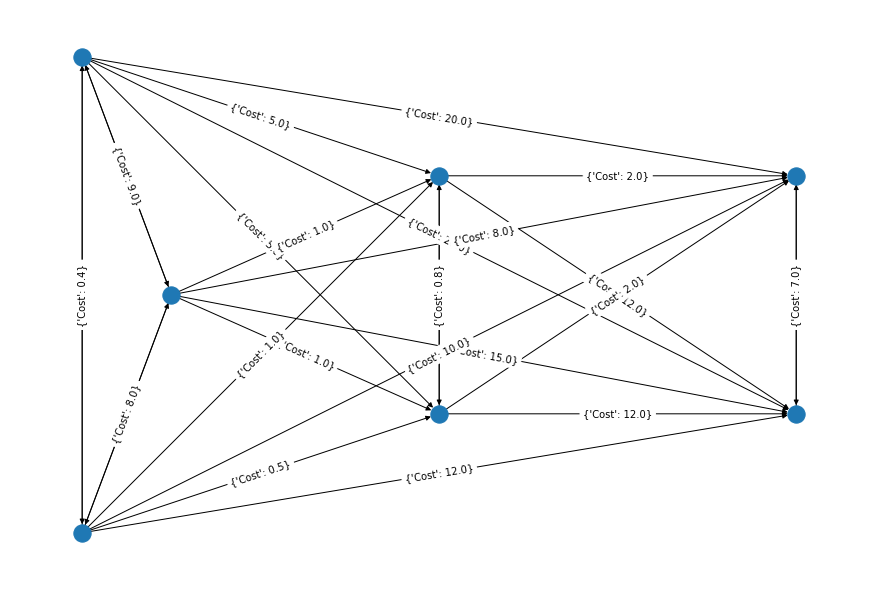

In [ ]:
nodePos = { 1: [-1,1], 
            2: [-0.75,0],
            3: [-1,-1],
            4: [0,0.5],
            5: [0,-0.5],
            6: [1,0.5],
            7: [1,-0.5]}
plt.figure(figsize=(12,8))
# draw the routes with their specified positions
nx.draw(G_routes, pos=nodePos)
labels = nx.get_edge_attributes(G_routes,'Cost')
# label the edges with their associated costs
nx.draw_networkx_edge_labels(G_routes, pos=nodePos)
print("The set of all possible routes")

Now let's formulate this as a mathematical program in Pyomo. Again we begin by declaring our Concrete Model:

In [ ]:
m = ConcreteModel()

where we will have two sets *i* and *j* for the set of nodes. These will be initialized as Sets using the list of nodes from the input data:

In [ ]:
m.i = Set(initialize=nodes, doc="Nodes i")
m.j = Set(initialize=nodes, doc="Nodes j")

next we can introduce all of our parameters. For the Param class in Pyomo, we need to first consider what indicies the parameter is indexed over. For our supply and demand, these are simply the lists of supply and demand nodes. For the costs and capacities, these are for every edge *i* and *j* . The indicies need to correspond to the keys in the dictionaries used to initialize the parameters.

In [ ]:
m.Supply = Param(supply_nodes, initialize=supply, doc="Supply Capacity of Plant i")
m.Demand = Param(demand_nodes, initialize=demand, doc="Demand from Market i")
m.cost = Param(m.i, m.j, initialize = cost, doc="Cost from node i to j")
m.capacity = Param(m.i, m.j, initialize = max_capacity, doc="Capacity of link i to j")

If we want to see any of the sets, parameters, constraints, etc., one can use the .pprint() to access information:

In [ ]:
m.Supply.pprint()

Supply : Supply Capacity of Plant i
    Size=3, Index=Supply_index, Domain=Any, Default=None, Mutable=False
    Key : Value
      1 : 200.0
      2 : 300.0
      3 : 100.0


next we will add the variable that will represent the amount of material transferred over each edge. The amount is indexed over every possible set of nodes *i* and *j*, and we can apply bounds to this variable so that no amount exceeds the capacity constraint:

In [ ]:
m.amount = Var(m.i, m.j, initialize=10, bounds = (0.0, max_capacity), doc="Amount from node i to j")

Now we can add out model constraints, where we write a function to represent each constraint. The constraints are then added to the model similar to the other model aspects. Every constraint accepts the model as an input argument. Additional arguments are iterators for the constraints. 

In [ ]:
def _supply_constraint(m, i):
    return sum(m.amount[i,j] for j in m.j) - sum(m.amount[j,i] for j in m.j) <= m.Supply[i]
m.supply_constraint = Constraint(supply_nodes, rule = _supply_constraint)

def _transshippment_constraint(m, i):
    return sum(m.amount[i,j] for j in m.j) - sum(m.amount[j,i] for j in m.j) == 0
m.transshippment_constraint = Constraint(transshippment_nodes, rule = _transshippment_constraint)

def _demand_constraint(m, i):
    return sum(m.amount[j,i] for j in m.j) - sum(m.amount[i,j] for j in m.j) == m.Demand[i]
m.demand_constraint = Constraint(demand_nodes, rule = _demand_constraint)

def _unallowed_routes(m, i, j):
    if (m.cost[i,j] == -1) or (i==j):
        return 0 == m.amount[i,j]
    else:
        return Constraint.Skip
m.unallowed_routes = Constraint(m.i, m.j, rule = _unallowed_routes)

Lastly we add the objective function, where the sense argument in Objective is whether to minimize or maximize. In this case we are looking to minimize total cost:

In [ ]:
def obj(m):
    return sum(m.cost[i,j]*m.amount[i,j] for j in m.j for i in m.i)
m.obj = Objective(rule=obj, sense=minimize)

And we can call our solver similar to before:

In [ ]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(m).write()

To get a better understanding of the results, we create a dictionary where the key is the non-zero weighted edge and the value is the optimal amount to be delivered: 

In [ ]:
opt_routes = {k:{'amount': value(m.amount[k])} for k in m.amount.keys() if value(m.amount[k]) != 0}
opt_routes

{(1, 3): {'amount': 180.0},
 (2, 4): {'amount': 120.0},
 (2, 6): {'amount': 180.0},
 (3, 4): {'amount': 80.0},
 (3, 5): {'amount': 200.0},
 (4, 6): {'amount': 200.0},
 (5, 6): {'amount': 200.0},
 (6, 7): {'amount': 180.0}}

#### Visualizing the optimal set of routes
Then visualize in the same way as we did previously:

The optimal set of routes with capacities


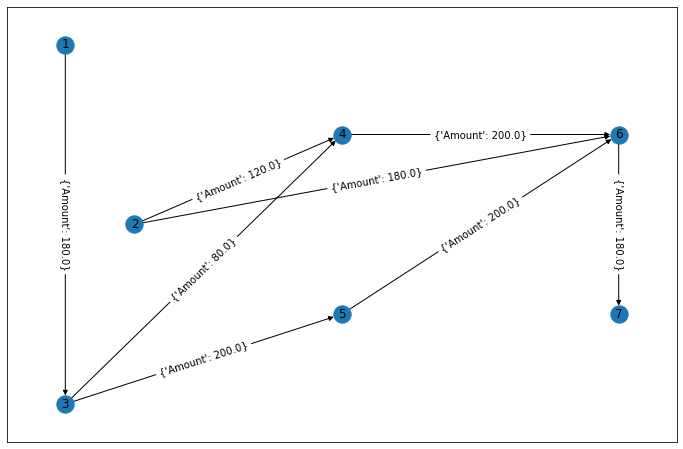

In [ ]:
G_opt = nx.DiGraph()
G_opt.add_edges_from(list(opt_routes.keys()))
for edge in G_opt.edges:
    G_opt.edges[edge]['Amount'] = opt_routes[edge]['amount']

plt.figure(figsize=(12,8))
# draw the routes with their specified positions
nx.draw_networkx(G_opt, with_labels=True, pos=nodePos)
# label the edges with their associated costs
nx.draw_networkx_edge_labels(G_opt, pos=nodePos)
print("The optimal set of routes with capacities")

One of the nice advantages of our Pyomo model is that we can quickly and easily add, delete, or modify any variables, costraints, or the objective function. Additionally, the model can handle many different types of models such as linear, nonlinear, MILP, MINLP, disjunctive, stochastic, etc. 

## Summary and References

This tutorial highlighted a brief and practical overview of the use of mathemaical programming to solve optimization problems. This subject is vast, with many options for not only other modeling languages, but also optimization solvers. In the references below, you can find more detail about the packages used in this tutorial as well as a variety of resources giving additional background on MP and optimization:

1. Pyomo: http://www.pyomo.org/
2. NetworkX: https://networkx.org/
3. What is mathematical optimization?: https://www.gurobi.com/resources/mathematical-optimization-web-page/
4. Everything you need to know as a beginner in mathematical programming:  
    https://www.informs.org/Explore/History-of-O.R.-Excellence/O.R.-Methodologies/Optimization-Mathematical-Programming
5. Additional Pyomo Model Examples: https://jckantor.github.io/ND-Pyomo-Cookbook/
6. Comprehensive list of Optimization Solvers and Modeling Tools (at the bottom): https://en.wikipedia.org/wiki/Pyomo
7. Combining Machine Leaning and Mathematical Optimization: http://www.optimizationdirect.com/200706.php 